Imports necessary Python libraries for data manipulation, visualization, and machine learning.
## Libraries:
- **pandas** and **numpy** for data manipulation.
- **matplotlib** and **seaborn** for data visualization.
- **train_test_split**, **GridSearchCV** for model training and evaluation.
- **StandardScaler**, **OneHotEncoder**, **ColumnTransformer**, **Pipeline** for data preprocessing.
- **LinearRegression**, **LogisticRegression** for building machine learning models.
- **mean_squared_error**, **accuracy_score**, **confusion_matrix**, **classification_report** for evaluating model performance.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report


In [11]:
# Load dataset 
#df = pd.read_csv(r'D:\My folder\ostad\module_11\bank+marketing\bank\bank.csv',sep=';')
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.csv"
df = pd.read_csv(url, sep=';')
# Display first few rows
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Target Variable Transformation  

Converts the target variable **y** (which indicates whether the client subscribed to a term deposit) into a binary format:  
- `1` for **'yes'**  
- `0` for **'no'**  
Then, it drops the original **y** column.  

### Details:  
- `map` function is used to convert categorical values to binary.  
- `drop` removes the original **y** column.  


In [14]:
# Convert categorical target variable to binary (yes=1, no=0)
df['deposit'] = df['y'].map({'yes': 1, 'no': 0})
df.drop(columns=['y'], inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [16]:
# Select relevant columns
features = ['age', 'job', 'marital', 'education', 'balance', 'campaign', 'previous', 'deposit']
df = df[features]
df.head()

,age,job,marital,education,balance,campaign,previous,deposit
0,30,unemployed,married,primary,1787,1,0,0
1,33,services,married,secondary,4789,1,4,0
2,35,management,single,tertiary,1350,1,1,0
3,30,management,married,tertiary,1476,4,0,0
4,59,blue-collar,married,secondary,0,1,0,0


## Splitting the Dataset  

Splits the dataset into features (**X**) and target variables (**y_logistic** for classification and **y_linear** for regression).  

### Details:  
- **X** contains all features except `deposit`.  
- **y_logistic** is the target for **logistic regression** (binary classification).  
- **y_linear** is the target for **linear regression** (predicting `balance`).  


In [17]:
# Split features and target
X = df.drop(columns=['deposit'])  # Features
y_logistic = df['deposit']        # Target for Logistic Regression
y_linear = df['balance']          # Target for Linear Regression

In [18]:
# Define categorical and numerical features
categorical_features = ['job', 'marital', 'education']
numerical_features = ['age', 'campaign', 'previous']

## Preprocessing Pipeline  

Creates a preprocessing pipeline to **scale numerical features** and **encode categorical features**.  

### Details:  
- **StandardScaler** scales numerical features to have a **mean of 0** and a **standard deviation of 1**.  
- **OneHotEncoder** converts categorical features into a **binary matrix**.  


In [19]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [20]:
# Split dataset
X_train, X_test, y_train_lin, y_test_lin = train_test_split(X, y_linear, test_size=0.2, random_state=42)
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_logistic, test_size=0.2, random_state=42)

## Feature Selection with Recursive Feature Elimination (RFE)  

Uses **Recursive Feature Elimination (RFE)** to select the **top 5 features** for linear regression.  

### Details:  
- **RFE** recursively removes the least important features and selects the **top 5**.  
- `preprocessor.fit_transform` applies the preprocessing pipeline to the training data.  
- `rfe.fit` fits the RFE model to the training data.  
- `selected_features` contains the names of the selected features.  


In [23]:
from sklearn.feature_selection import RFE

# Linear Regression Feature Selection
lin_reg = LinearRegression()
rfe = RFE(lin_reg, n_features_to_select=5)
X_transformed = preprocessor.fit_transform(X_train)

# Get the feature names after transformation
feature_names = preprocessor.get_feature_names_out()
rfe.fit(X_transformed, y_train_lin)
selected_features = np.array(feature_names)[rfe.support_]
print("Selected Features for Linear Regression:", selected_features)

Selected Features for Linear Regression: ['cat__job_housemaid' 'cat__job_retired' 'cat__marital_divorced'
 'cat__education_primary' 'cat__education_secondary']


## Training and Evaluating a Linear Regression Model  

Trains a **linear regression model** and evaluates its performance.  

### Details:  
- **Pipeline** combines **preprocessing** and **model training**.  
- **LinearRegression** is used to predict the **balance**.  
- **mean_squared_error** calculates the **MSE** between actual and predicted values.


Linear Regression Mean Squared Error: 14020779.17040593


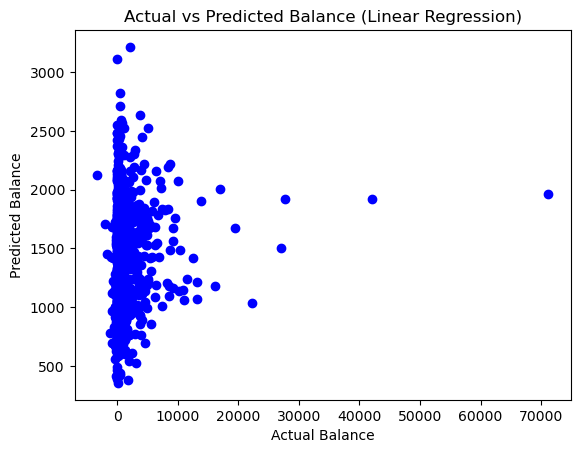

In [24]:
# Train Linear Regression with selected features
pipeline_lin = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

pipeline_lin.fit(X_train, y_train_lin)

# Predictions
y_pred_lin = pipeline_lin.predict(X_test)

# Evaluate Model
mse = mean_squared_error(y_test_lin, y_pred_lin)
print("Linear Regression Mean Squared Error:", mse)

# Plot Predictions
plt.scatter(y_test_lin, y_pred_lin, color='blue')
plt.xlabel("Actual Balance")
plt.ylabel("Predicted Balance")
plt.title("Actual vs Predicted Balance (Linear Regression)")
plt.show()


## Training and Evaluating a Logistic Regression Model  

Trains a **logistic regression model** using **GridSearchCV** for hyperparameter tuning and evaluates its performance.  

### Details:  
- **Pipeline** combines **preprocessing** and **model training**.  
- **GridSearchCV** performs a **grid search** over the specified parameter grid to find the **best parameters**.  
- **LogisticRegression** is used for **binary classification**.  
- **accuracy_score** calculates the **accuracy** of the model.  
- **classification_report** provides **precision, recall, F1-score,** and **support** for each class.  


Best Parameters for Logistic Regression: {'model__C': 0.01, 'model__max_iter': 100}
Logistic Regression Accuracy: 0.8917127071823204

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       807
           1       0.00      0.00      0.00        98

    accuracy                           0.89       905
   macro avg       0.45      0.50      0.47       905
weighted avg       0.80      0.89      0.84       905



C:\Users\43667\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\43667\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\43667\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

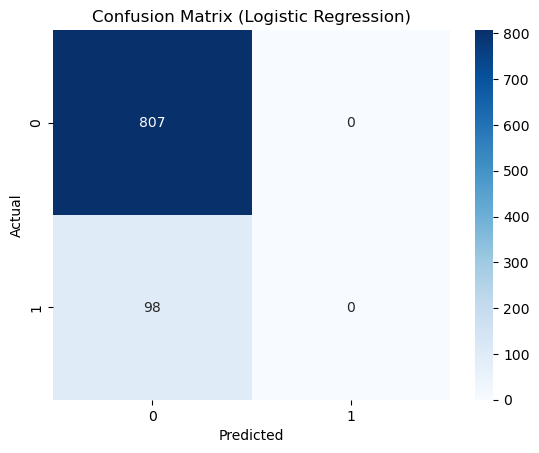

In [25]:
# Logistic Regression Model
log_reg = LogisticRegression()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'model__max_iter': [100, 200, 300]
}

pipeline_log = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

grid_search = GridSearchCV(pipeline_log, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_log)

# Best parameters
print("Best Parameters for Logistic Regression:", grid_search.best_params_)

# Predictions
y_pred_log = grid_search.best_estimator_.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test_log, y_pred_log)
conf_matrix = confusion_matrix(y_test_log, y_pred_log)
report = classification_report(y_test_log, y_pred_log)

print("Logistic Regression Accuracy:", accuracy)
print("\nClassification Report:\n", report)

# Confusion Matrix Heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()


## Analysis of Results  

### Linear Regression:  
- The model achieved a **Mean Squared Error (MSE)** of approximately **14,020,779.17**, indicating a **relatively high error** in predicting the balance.  
- The **scatter plot** shows that the model's predictions are **not very accurate**, especially for **higher balance values**.  

### Logistic Regression:  
- The model achieved an **accuracy** of approximately **89.17%**.  
- However, the **classification report** shows **poor precision and recall** for the **positive class (1)**, indicating that the model struggles to correctly identify **clients who will subscribe to a term deposit**.  
